In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import scienceplots

In [2]:
# science plots
plt.style.use('science')

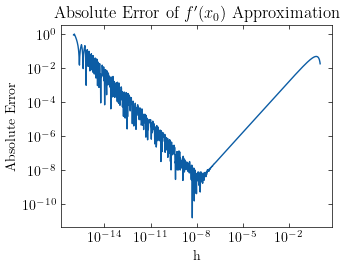

In [3]:
f = lambda x: np.cos(x)
x0 = 1.2
h = np.logspace(-16, 0, 1000)
f_prime = (f(x0 + h) - f(x0)) / h
error = np.abs(f_prime + np.sin(x0))

plt.loglog(h, error)
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.title("Absolute Error of $f'(x_0)$ Approximation")
plt.show()

# The error is minimized at h = 10^-8. This is because the error is the difference between the approximation and the
# actual value. As h approaches 0, the approximation becomes more accurate. However, as h approaches 0, the
# denominator approaches 0, which causes the approximation to become less accurate. 10^-8 is the point at which the
# error is minimized because there is a roundoff error associated with the subtraction of two numbers that are very
# close to each other. This roundoff error is minimized at 10^-8.

In [4]:
# if a ≈ b, then the determinant of the matrix is close to 0. This means that the matrix is close to singular, which
# means that the matrix is close to not having an inverse. This means that there is a numerical difficulty in solving
# this linear system.

# 𝑧 = 𝑥 + 𝑦 = 1 / (a + b)

# True, because when a ≈ b, (a^2 - b^2) becomes very small and difficult to compute. On the other hand,
# when a, b > 0, x + y is much easier to compute, regardless of the values of a and b.


In [5]:
# Write a routine (call it) bisect to find the root of the function 𝑓(𝑥) = √𝑥 − 2.1 starting from the interval [2,10],
# with 𝑎𝑡𝑜𝑙 = 1.𝑒 − 8.
# a) How many iterations are required? Does the iteration count match the expectations, based on our
# convergence analysis?
# b) What is the resulting absolute error? Could this absolute error be predicted by our convergence analysis?

#Problem 5: Bisection Method
def bisect(f, a, b, tolerance):

  n = 0
  data=[]
  mprev= np.abs((a+b)/2)
  while abs(b - a) > tolerance:
    m = (a + b) / 2
    n = n + 1
    abserror= np.abs((2.1)**2-m)
    convergence=np.abs(((2.1)**2-m))/np.abs(((2.1)**2-mprev))
    data.append((n, m, abserror, convergence))
    mprev = m
    if f(m) == 0:
      return m
    elif f(a) * f(m) < 0:
      b = m
    else:
      a = m
  headers= ["Number of Iteration","Root of the problem","Absolute Error"]
  floatfmts = ('.8f', '.8f', '.8f')
  table = tabulate(data, headers=headers,floatfmt=floatfmts, tablefmt="latex")

  print(table)
  return m


#Number of Iterations Theoretically for Bisection
def biterations(a, b, tolerance):
 n_iterations = np.log2((b - a) / tolerance)
 print("Number of iterations theoretically: ", n_iterations)
 return n_iterations

f = lambda x: np.sqrt(x) - 2.1
a = 2
b = 10
atol = 1e-8
root = bisect(f, a, b, atol)
n_iterations = np.log2((b - a) / atol)
print("Number of iterations: ", n_iterations)

print("Root: ", root)
absolute_error = np.abs(root - 2.1)
print("Absolute error: ", absolute_error)

\begin{tabular}{rrrr}
\hline
    &   Number of Iteration &   Root of the problem &   Absolute Error \\
\hline
  1 &            6.00000000 &            1.59000000 &        1         \\
  2 &            4.00000000 &            0.41000000 &        0.257862  \\
  3 &            5.00000000 &            0.59000000 &        1.43902   \\
  4 &            4.50000000 &            0.09000000 &        0.152542  \\
  5 &            4.25000000 &            0.16000000 &        1.77778   \\
  6 &            4.37500000 &            0.03500000 &        0.21875   \\
  7 &            4.43750000 &            0.02750000 &        0.785714  \\
  8 &            4.40625000 &            0.00375000 &        0.136364  \\
  9 &            4.42187500 &            0.01187500 &        3.16667   \\
 10 &            4.41406250 &            0.00406250 &        0.342105  \\
 11 &            4.41015625 &            0.00015625 &        0.0384615 \\
 12 &            4.40820312 &            0.00179688 &       11.5       \\
 1

In [6]:
# Write routines for problem 5 that implement Newton’s and fixed point method, and compare results and stablish
# rate of convergence of each of the 3 methods (bisection, fixed point, Newton).

# Fixed point method
def fixed_point (g, x0, atol):
    n = 0
    data=[]
    x1 = g(x0)
    while np.abs(x1 - x0) > atol:
        n = n + 1
        abserror= np.abs((2.1)**2-x1)
        convergence=np.abs(((2.1)-x1))/np.abs(((2.1)**2-x0))
        data.append((n, x1, abserror, convergence))
        x0 = x1
        x1 = g(x0)
    headers= ["Number of Iteration","Root of the problem","Absolute Error"]
    floatfmts = ('.8f', '.8f', '.8f')
    table = tabulate(data, headers=headers,floatfmt=floatfmts, tablefmt="grid")
    
    print(table)
    return x1
    
# Newton's method
def newton (f, f_prime, x0, atol):
    n = 0
    data=[]
    x1 = x0 - f(x0) / f_prime(x0)
    while np.abs(x1 - x0) > atol:
        n = n + 1
        abserror= np.abs((2.1)**2-x1)
        convergence=np.abs(((2.1)-x1))/np.abs(((2.1)**2-x0))
        data.append((n, x1, abserror, convergence))
        x0 = x1
        x1 = x0 - f(x0) / f_prime(x0)
    headers= ["Number of Iteration","Root of the problem","Absolute Error"]
    floatfmts = ('.8f', '.8f', '.8f')
    table = tabulate(data, headers=headers,floatfmt=floatfmts, tablefmt="grid")
    
    print(table)
    return x1

f = lambda x: np.sqrt(x) - 2.1
f_prime = lambda x: 1 / (2 * np.sqrt(x))
x0 = 2
atol = 1e-8
# Fixed point method
g = lambda x: np.sqrt(x)
x0 = 2
atol = 1e-8
root = fixed_point(g, x0, atol)

print("Fixed point method")
print("Root: ", root)
absolute_error = np.abs(root - 2.1)
print("Absolute error: ", absolute_error)

rate_of_convergence = np.log2(np.abs(g(root) - root) / np.abs(g(root - 1) - root))
print("Rate of convergence for fixed point method: ", rate_of_convergence)

# Newton's method
f_prime = lambda x: 1 / (2 * np.sqrt(x))
x0 = 2
atol = 1e-8
root = newton(f, f_prime, x0, atol)

print("Newton's method")
print("Root: ", root)
absolute_error = np.abs(root - 2.1)
print("Absolute error: ", absolute_error)

rate_of_convergence = np.log2(np.abs(f(root)) / np.abs(f(root - 1)))
print("Rate of convergence for Newton's method: ", rate_of_convergence)

# Bisection method
a = 2
b = 10
atol = 1e-8
root = bisect(f, a, b, atol)

print("Bisection method")
print("Root: ", root)
absolute_error = np.abs(root - 2.1)
print("Absolute error: ", absolute_error)

rate_of_convergence = np.log2((b - a) / atol)
print("Rate of convergence for bisection method: ", rate_of_convergence)

+----+-----------------------+-----------------------+------------------+
|    |   Number of Iteration |   Root of the problem |   Absolute Error |
+====+=======================+=======================+==================+
|  1 |            1.41421356 |            2.99578644 |         0.284559 |
+----+-----------------------+-----------------------+------------------+
|  2 |            1.18920712 |            3.22079288 |         0.304025 |
+----+-----------------------+-----------------------+------------------+
|  3 |            1.09050773 |            3.31949227 |         0.31343  |
+----+-----------------------+-----------------------+------------------+
|  4 |            1.04427378 |            3.36572622 |         0.318038 |
+----+-----------------------+-----------------------+------------------+
|  5 |            1.02189715 |            3.38810285 |         0.320318 |
+----+-----------------------+-----------------------+------------------+
|  6 |            1.01088929 |        

\begin{tabular}{rrrr}
\hline
    &   Number of Iteration &   Root of the problem &   Absolute Error \\
\hline
  1 &            1.31421356 &            3.09578644 &         0.326052 \\
  2 &            0.36060510 &            4.04939490 &         0.561859 \\
  3 &           -1.13889086 &            5.54889086 &         0.799846 \\
\hline
\end{tabular}


/var/folders/kx/jthcc3vd47d8qxdpjg9dvcgw0000gn/T/ipykernel_77092/3248576972.py:9: RuntimeWarning: invalid value encountered in sqrt
  g = lambda x: np.sqrt(x) - 2.1 + x


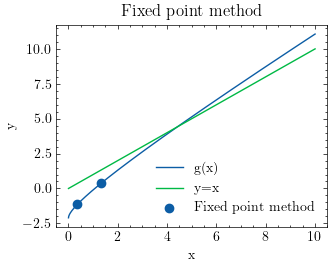

In [7]:
#  Plot the function and show in this
# plot the progress of each of the methods.

# for each method, plot the progress of the method
# (i.e., the sequence of iterates) as a function of the iteration number. In each case, plot the error as a function of
# the iteration number. Comment on the results.

# Fixed point method
g = lambda x: np.sqrt(x) - 2.1 + x
x0 = 2
atol = 1e-8
def fixed_point_list (g, x0, atol):
    n = 0
    data=[]
    x1 = g(x0)
    while np.abs(x1 - x0) > atol:
        n = n + 1
        abserror= np.abs((2.1)**2-x1)
        convergence=np.abs(((2.1)-x1))/np.abs(((2.1)**2-x0))
        data.append((n, x1, abserror, convergence))
        x0 = x1
        x1 = g(x0)
        
    table = tabulate(data, headers=["Number of Iteration","Root of the problem","Absolute Error"],floatfmt=('.8f', '.8f', '.8f'), tablefmt="latex")
    print(table)
    return data

data = fixed_point_list(g, x0, atol)

n = [row[0] for row in data]
x = [row[1] for row in data]
abserror = [row[2] for row in data]
convergence = [row[3] for row in data]

space = np.linspace(0, 10, 1000)
plt.plot(space, g(space), label="g(x)")
plt.plot(space, space, label="y=x")
plt.scatter(x, g(x), label="Fixed point method")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fixed point method")
plt.legend()
plt.show()

\begin{tabular}{rrrr}
\hline
    &   Number of Iteration &   Root of the problem &   Absolute Error \\
\hline
  1 &            6.00000000 &            1.59000000 &      2.45283     \\
  2 &            4.00000000 &            0.41000000 &      1.19497     \\
  3 &            5.00000000 &            0.59000000 &      7.07317     \\
  4 &            4.50000000 &            0.09000000 &      4.0678      \\
  5 &            4.25000000 &            0.16000000 &     23.8889      \\
  6 &            4.37500000 &            0.03500000 &     14.2187      \\
  7 &            4.43750000 &            0.02750000 &     66.7857      \\
  8 &            4.40625000 &            0.00375000 &     83.8636      \\
  9 &            4.42187500 &            0.01187500 &    619.167       \\
 10 &            4.41406250 &            0.00406250 &    194.868       \\
 11 &            4.41015625 &            0.00015625 &    568.654       \\
 12 &            4.40820312 &            0.00179688 &  14772.5         \\
 1

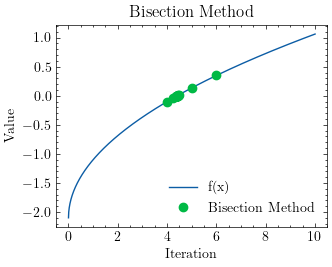

In [8]:
g = lambda x: np.sqrt(x)
f = lambda x: np.sqrt(x) - 2.1
x0 = 2
atol = 1e-8

def bisect_list(f, a, b, tolerance):

  n = 0
  data=[]
  mprev= np.abs((a+b)/2)
  while abs(b - a) > tolerance:
    m = (a + b) / 2
    n = n + 1
    abserror= np.abs((2.1)**2-m)
    convergence=np.abs(((2.1)-m))/np.abs(((2.1)**2-mprev))
    data.append((n, m, abserror, convergence))
    mprev = m
    if f(m) == 0:
      return m
    elif f(a) * f(m) < 0:
      b = m
    else:
      a = m
  headers= ["Number of Iteration","Root of the problem","Absolute Error"]
  floatfmts = ('.8f', '.8f', '.8f')
  table = tabulate(data, headers=headers,floatfmt=floatfmts, tablefmt="latex")
  print(table)
  return data

data = bisect_list(f, a, b, atol)

n = [row[0] for row in data]
x = [row[1] for row in data]
abserror = [row[2] for row in data]
convergence = [row[3] for row in data]

# plot each point in the sequence
space = np.linspace(0, 10, 1000)
plt.plot(space, f(space))
plt.plot(x, f(x), 'o')

plt.legend(["f(x)", "Bisection Method"])
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Bisection Method")
plt.show()

\begin{tabular}{rrrr}
\hline
    &   Number of Iteration &   Root of the problem &   Absolute Error \\
\hline
  1 &            3.93969696 &            0.47030304 &          0.76336 \\
  2 &            4.39674439 &            0.01325561 &          4.88354 \\
  3 &            4.40999002 &            0.00000998 &        174.265   \\
  4 &            4.41000000 &            0.00000000 &     231557       \\
\hline
\end{tabular}


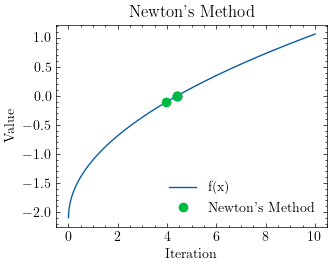

In [9]:
# Newton's method
f = lambda x: np.sqrt(x) - 2.1
f_prime = lambda x: 1 / (2 * np.sqrt(x))
x0 = 2
atol = 1e-8

def newton_list (f, f_prime, x0, atol):
    n = 0
    data=[]
    x1 = x0 - f(x0) / f_prime(x0)
    while np.abs(x1 - x0) > atol:
        n = n + 1
        abserror= np.abs((2.1)**2-x1)
        convergence=np.abs(((2.1)-x1))/np.abs(((2.1)**2-x0))
        data.append((n, x1, abserror, convergence))
        x0 = x1
        x1 = x0 - f(x0) / f_prime(x0)
    headers= ["Number of Iteration","Root of the problem","Absolute Error"]
    floatfmts = ('.8f', '.8f', '.8f')
    table = tabulate(data, headers=headers,floatfmt=floatfmts, tablefmt="latex")
    
    print(table)
    return data

data = newton_list(f, f_prime, x0, atol)

n = [row[0] for row in data]
x = [row[1] for row in data]
abserror = [row[2] for row in data]
convergence = [row[3] for row in data]

# plot each point in the sequence
space = np.linspace(0, 10, 1000)
plt.plot(space, f(space))
plt.plot(x, f(x), 'o')

plt.legend(["f(x)", "Newton's Method"])
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Newton's Method")
plt.show()

In [10]:
# Write a routine (call it tri) that solves tridiagonal systems of equations of size 𝑛. Assume that no pivoting is
# needed, but do not assume that the tridiagonal matrix 𝐴 is symmetric. Your program should expect as input four
# vectors of size 𝑛 or (𝑛 − 1): one right-hand-side 𝑏 and the three nonzero diagonals of 𝐴. It should calculate and
# return 𝑥 = 𝐴−1𝑏 using a Gaussian elimination method.
# void solve_tridiagonal_in_place_destructive(float * restrict const x, const size_t X, const float * restrict const a, const float * restrict const b, float * restrict const c) {


def tri(a, b, c, d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)
    
    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

A = np.zeros((10, 10))
for i in range(10):
    A[i, i] = 2
    if i != 0:
        A[i, i - 1] = 1
    if i != 9:
        A[i, i + 1] = 1

a = np.zeros(9)
b = np.zeros(10)
c = np.zeros(9)
d = np.zeros(10)

for i in range(10):
    b[i] = 2
    d[i] = 1
    if i != 0:
        a[i - 1] = 1
    if i != 9:
        c[i] = 1

x = tri(a, b, c, d)
print(x)      
print(np.linalg.solve(A, d))

[0.45454545 0.09090909 0.36363636 0.18181818 0.27272727 0.27272727
 0.18181818 0.36363636 0.09090909 0.45454545]
[0.45454545 0.09090909 0.36363636 0.18181818 0.27272727 0.27272727
 0.18181818 0.36363636 0.09090909 0.45454545]
